Zuveir Jameer

Imperial Business Analytics course

Thursday 8th December 2022

Assignment 1

Objective
The product team has asked you to follow the number of bookings per day in two key markets and alert them when the daily fluctuation is too high. For this alert, they’ve asked you to create a 30-­day rolling average and alert them when the daily value is above or below two standard deviations of the rolling mean.
The data in csv format for you to test out your alert. When you apply this alert over the past year for these two markets, how many alerts would have been triggered by this rule for each market?

Data Dictionary
●	City: City details
●	Ds: date
●	Bookings: Bookings made in the day


I made the following Assumptions:

1. Given that 30-day rolling mean was used, I used 30-day rolling Standard Deviation. This had the effect of creating a smoother SD that was aligned with the 30-day rolling average

In [128]:
import pandas as pd
pd.set_option('mode.chained_assignment', None) #Support warning with copying of dataframes
# This code will not complain!
# pd.reset_option("mode.chained_assignment")

In [129]:
url = 'https://raw.githubusercontent.com/vkoul/data/main/misc/bookings.csv'
df = pd.read_csv(url)
df.head(10) 

,city,ds,bookings
0,City_2,01/01/2013,69
1,City_2,01/02/2013,101
2,City_2,01/03/2013,134
3,City_2,01/04/2013,155
4,City_2,01/05/2013,104
5,City_2,01/06/2013,121
6,City_2,01/07/2013,143
7,City_2,01/08/2013,173
8,City_2,01/09/2013,142
9,City_2,01/10/2013,154


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   city      729 non-null    object
 1   ds        729 non-null    object
 2   bookings  729 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 17.2+ KB


In [131]:
df['dates'] = pd.to_datetime(df['ds'],infer_datetime_format=True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   city      729 non-null    object        
 1   ds        729 non-null    object        
 2   bookings  729 non-null    int64         
 3   dates     729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 22.9+ KB


In [133]:
df

,city,ds,bookings,dates
0,City_2,01/01/2013,69,2013-01-01
1,City_2,01/02/2013,101,2013-01-02
2,City_2,01/03/2013,134,2013-01-03
3,City_2,01/04/2013,155,2013-01-04
4,City_2,01/05/2013,104,2013-01-05
...,...,...,...,...
724,City_1,12/27/13,55,2013-12-27
725,City_1,12/28/13,63,2013-12-28
726,City_1,12/29/13,55,2013-12-29
727,City_1,12/30/13,66,2013-12-30


#### Create Dataframes for City_1 and City_2

In [134]:
city_1=df.loc[df['city'] =='City_1']

In [135]:
city_2=df[df['city'] =='City_2']

#### Rolling mean for City_1 and City_2

In [136]:
city_1.loc[:,'Rolling Average'] = city_1.loc[:,'bookings'].rolling(30).mean()

In [137]:
city_2.loc[:,'Rolling Average'] = city_2.loc[:,'bookings'].rolling(30).mean()

#### Rolling standard deviation for City_1 and City_2

In [138]:
city_1['Rolling StDev'] = city_1['bookings'].rolling(30).std()

In [139]:
city_2['Rolling StDev'] = city_2['bookings'].rolling(30).std()

In [140]:
city_1

,city,ds,bookings,dates,Rolling Average,Rolling StDev
364,City_1,01/01/2013,16,2013-01-01,NaN,NaN
365,City_1,01/02/2013,20,2013-01-02,NaN,NaN
366,City_1,01/03/2013,15,2013-01-03,NaN,NaN
367,City_1,01/04/2013,22,2013-01-04,NaN,NaN
368,City_1,01/05/2013,16,2013-01-05,NaN,NaN
...,...,...,...,...,...,...
724,City_1,12/27/13,55,2013-12-27,63.100000,12.949105
725,City_1,12/28/13,63,2013-12-28,63.166667,12.943067
726,City_1,12/29/13,55,2013-12-29,62.733333,12.993190
727,City_1,12/30/13,66,2013-12-30,63.533333,12.397812


In [141]:
city_2

,city,ds,bookings,dates,Rolling Average,Rolling StDev
0,City_2,01/01/2013,69,2013-01-01,NaN,NaN
1,City_2,01/02/2013,101,2013-01-02,NaN,NaN
2,City_2,01/03/2013,134,2013-01-03,NaN,NaN
3,City_2,01/04/2013,155,2013-01-04,NaN,NaN
4,City_2,01/05/2013,104,2013-01-05,NaN,NaN
...,...,...,...,...,...,...
359,City_2,12/27/13,232,2013-12-27,197.500000,36.328720
360,City_2,12/28/13,182,2013-12-28,198.500000,35.434982
361,City_2,12/29/13,199,2013-12-29,199.966667,34.469860
362,City_2,12/30/13,209,2013-12-30,201.900000,33.233085


In [142]:
city_1.dropna(inplace=True)

In [143]:
city_2.dropna(inplace=True)

#### Calculating Standard deviation for high

In [144]:
city_1['TwosdAbove'] = city_1['Rolling Average'] + (2*city_1['Rolling StDev'])

In [145]:
city_2['TwosdAbove'] = city_2['Rolling Average'] + (2*city_2['Rolling StDev'])

#### Calculating Standard deviation for Low

In [146]:
city_1['TwosdLow'] = city_1['Rolling Average'] - (2*city_1['Rolling StDev'])

In [147]:
city_2['TwosdLow'] = city_2['Rolling Average'] - (2*city_2['Rolling StDev'])

#### Create a new column and add Alert for bookings below 2SD

In [148]:
city_1['Alert_Below'] = city_1['bookings'] < city_1['TwosdLow'] 

In [149]:
city_2['Alert_Below'] = city_2['bookings'] < city_2['TwosdLow'] 

#### creating new columns and adding Alert for bookings above 2SD

In [150]:
city_1['Alert_Above'] = city_1['bookings'] > city_1['TwosdAbove'] 

In [151]:
city_2['Alert_Above'] = city_2['bookings'] > city_2['TwosdAbove'] 

#### City 1 Alerts

In [152]:
city_1_Alert = city_1[city_1['Alert_Above'] == True]
city_1_Alert = pd.concat([city_1_Alert,city_1[city_1['Alert_Below'] == True]])

In [159]:
city_1_Alert

,city,ds,bookings,dates,Rolling Average,Rolling StDev,TwosdAbove,TwosdLow,Alert_Below,Alert_Above
399,City_1,02/05/2013,34,2013-02-05,22.866667,4.811863,32.490392,13.242941,False,True
400,City_1,02/06/2013,38,2013-02-06,23.100000,5.358525,33.817051,12.382949,False,True
407,City_1,2/13/13,35,2013-02-13,24.366667,5.275077,34.916821,13.816513,False,True
420,City_1,2/26/13,46,2013-02-26,26.100000,6.809476,39.718952,12.481048,False,True
455,City_1,04/02/2013,44,2013-04-02,29.100000,6.509145,42.118290,16.081710,False,True
491,City_1,05/08/2013,45,2013-05-08,28.433333,5.846799,40.126931,16.739736,False,True
503,City_1,5/20/13,45,2013-05-20,29.633333,6.178290,41.989913,17.276754,False,True
517,City_1,06/03/2013,45,2013-06-03,32.233333,6.223888,44.681109,19.785557,False,True
541,City_1,6/27/13,49,2013-06-27,35.366667,6.354381,48.075429,22.657904,False,True
545,City_1,07/01/2013,51,2013-07-01,36.833333,6.838448,50.510229,23.156438,False,True


#### City 2 Alerts

In [153]:
city_2_Alert = city_2[city_2['Alert_Above'] == True]
city_2_Alert = pd.concat([city_2_Alert,city_2[city_2['Alert_Below'] == True]])

In [160]:
city_2_Alert

,city,ds,bookings,dates,Rolling Average,Rolling StDev,TwosdAbove,TwosdLow,Alert_Below,Alert_Above
43,City_2,2/13/13,223,2013-02-13,152.000000,27.697877,207.395755,96.604245,False,True
50,City_2,2/20/13,221,2013-02-20,161.166667,28.048091,217.262848,105.070485,False,True
91,City_2,04/02/2013,283,2013-04-02,206.333333,30.447618,267.228570,145.438096,False,True
169,City_2,6/19/13,326,2013-06-19,243.833333,40.858109,325.549551,162.117116,False,True
189,City_2,07/10/2013,382,2013-07-10,269.233333,51.275243,371.783820,166.682847,False,True
234,City_2,8/24/13,209,2013-08-24,317.700000,53.134929,423.969858,211.430142,True,False
290,City_2,10/19/13,173,2013-10-19,284.000000,51.602593,387.205186,180.794814,True,False
291,City_2,10/20/13,163,2013-10-20,279.866667,56.122239,392.111145,167.622188,True,False


#### Setting date column as an index

In [154]:
#city_1.set_index('dates', inplace=True)

In [155]:
#city_2.set_index('dates', inplace=True)

#### Graphs

<AxesSubplot: title={'center': 'CITY 1 Bookings and 2SD above and below 30 day rolling mean'}>

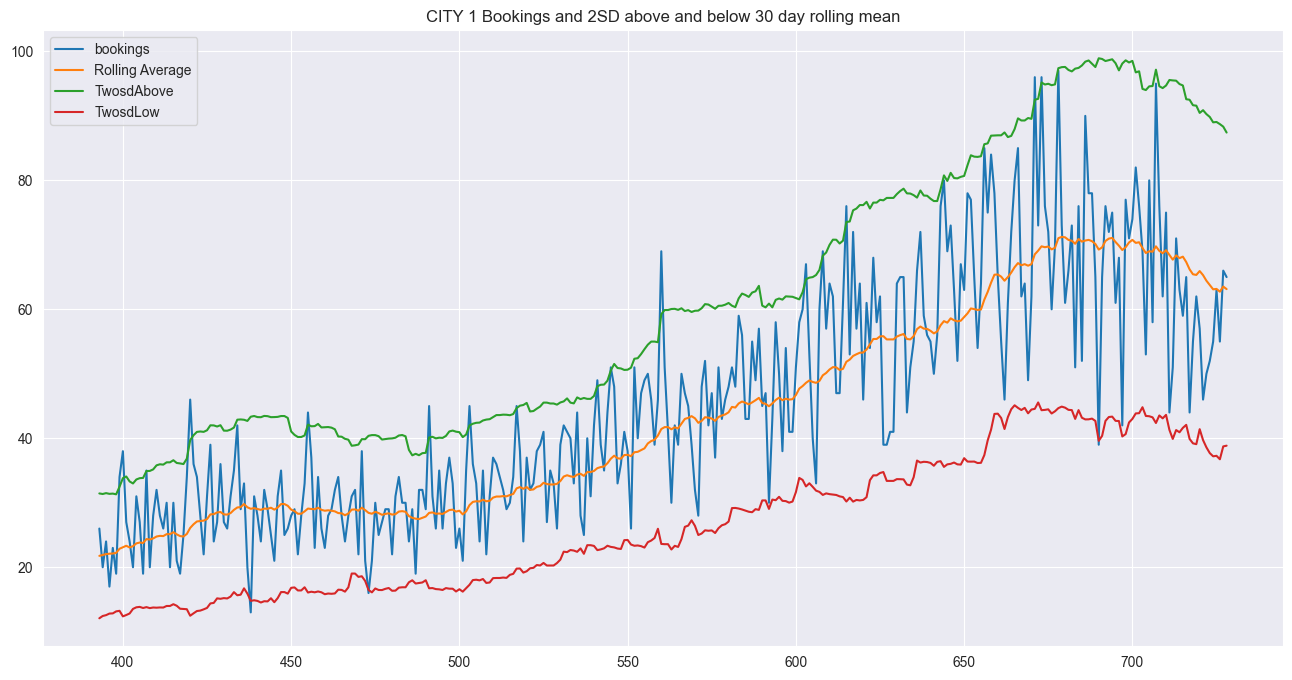

In [156]:

city_1[['bookings', 'Rolling Average', 'TwosdAbove', 'TwosdLow']].plot(use_index=True, title='CITY 1 Bookings and 2SD above and below 30 day rolling mean',figsize=(16, 8))

<AxesSubplot: title={'center': 'CITY 2 Bookings and 2SD above and below 30 day rolling mean '}>

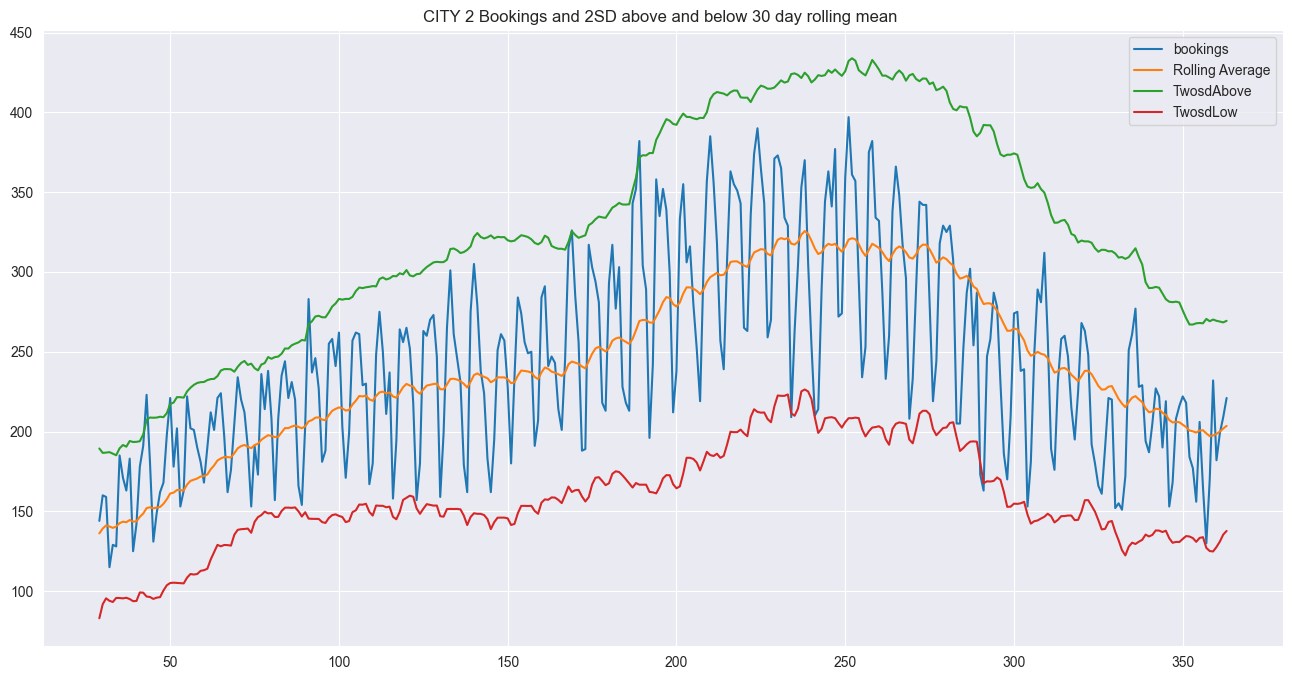

In [157]:

city_2[['bookings', 'Rolling Average', 'TwosdAbove', 'TwosdLow']].plot(use_index=True ,title='CITY 2 Bookings and 2SD above and below 30 day rolling mean ',figsize=(16, 8))

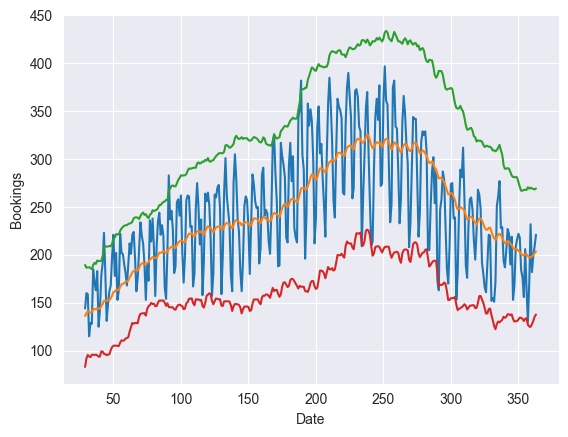

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
plt.plot(city_2[['bookings', 'Rolling Average', 'TwosdAbove', 'TwosdLow']])
plt.xlabel("Date")
plt.ylabel("Bookings")

plt.show()